## What is Datashader?

**Datashader turns even the largest datasets into images, faithfully preserving the data's distribution.**

Datashader is an [open-source](https://github.com/bokeh/datashader/) Python 2 and 3 library for analyzing and visualizing large datasets. Specifically, datashader is designed to "rasterize" or "aggregate" datasets into regular grids that can be viewed as images, making it simple and quick to see the properties and patterns of your data. Datashader can plot a billion points in a second or so on a 16GB laptop, and scales up easily to out-of-core or distributed processing for even larger datasets.

This page of the getting-started guide will give a simple example to show how it works, and the following page will show how to use Datashader as a standalone library for generating arrays or images directly
([2-Pipeline](2-Pipeline.ipynb)).  Next we'll show how to use Datashader as a component in a larger visualization system like [HoloViews](http://holoviews.org) or [Bokeh](http://bokeh.pydata.org) that provides interactive plots with dynamic zooming, labeled axes, and overlays and layouts ([3-Interactivity](3-Interactivity.ipynb)).  More detailed information about each topic is then provided in the [User Guide](../user_guide/).

## Example: NYC taxi trips

To illustrate how this process works, we will demonstrate some of the key features of Datashader using a standard "big-data" example: millions of taxi trips from New York City, USA.  First let's import the libraries we are going to use and then read the dataset.

In [1]:
import datashader as ds
import pandas as pd
import dask.dataframe as dd
from colorcet import fire
from datashader import transfer_functions as tf

#df = pd.read_csv('../data/nyc_taxi.csv', usecols=['dropoff_x', 'dropoff_y'])
#df.head()
all_data = dd.read_parquet('/Users/robertwoody/Documents/GitHub/nyc_taxi/data/clean_taxi.parq').persist()
import numpy as np
origin_shift = 2 * np.pi * 6378137 / 2.0
all_data['y']=(np.log(np.tan((90 + all_data['pickup_latitude']) * np.pi / 360.0)) / (np.pi / 180.0))* origin_shift / 180.0
all_data['x']=all_data['pickup_longitude']*origin_shift / 180.0
data = all_data.loc[(all_data.pickup_latitude>40.67)&(all_data.pickup_latitude<40.90)&
                      (all_data.pickup_longitude<-73.71) & (all_data.pickup_longitude>-74.1)&
                      (all_data.passenger_count>0),:].compute()

Here you can see that we have a variety of columns with data about each of the 10 million taxi trips here, such as the locations in Web Mercator coordinates, the distance, etc.  With datashader, we can choose what we want to plot on the `x` and `y` axes and see the full data immediately, with no parameter tweaking, magic numbers, subsampling, or approximation, up to the resolution of the display:

In [2]:
import colorcet
agg = ds.Canvas(plot_width = 900, plot_height = 700).points(data, 'x','y')
tf.set_background(tf.shade(agg, cmap=colorcet.fire),"black")


Here you can immediately see that the data points are aligned to a street grid, that some areas have much more traffic than others, and that the quality of the signal varies spatially (with some areas having blurry patterns that indicate GPS errors, perhaps due to tall buildings). Getting a plot like this with other approaches would take quite a bit of time and effort, but with datashader it appears in milliseconds without trial and error.

The output above is just a bare image, which is all that datashader knows how to generate directly.  But datashader can integrate closely with Bokeh, HoloViews, and GeoViews, which makes it simple to allow interactive zooming, axis labeling, overlays and layouts, and complex web apps.  For example, making a zoomable interactive overlay on a geographic map requires just a few more lines of code:

In [3]:
data['passenger_count'] = data['passenger_count'].astype('category')

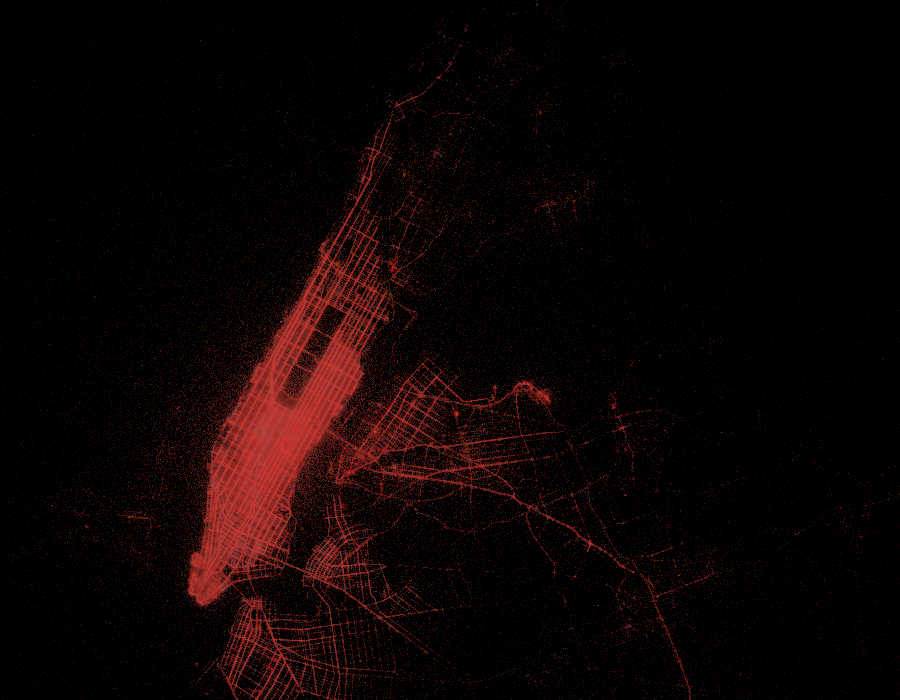

In [4]:
import colorcet
agg = ds.Canvas(plot_width = 900, plot_height = 700).points(data, 'x','y',agg=ds.count_cat('passenger_count'))
tf.set_background(tf.shade(agg,cmap=colorcet.fire),"black",name="testing")



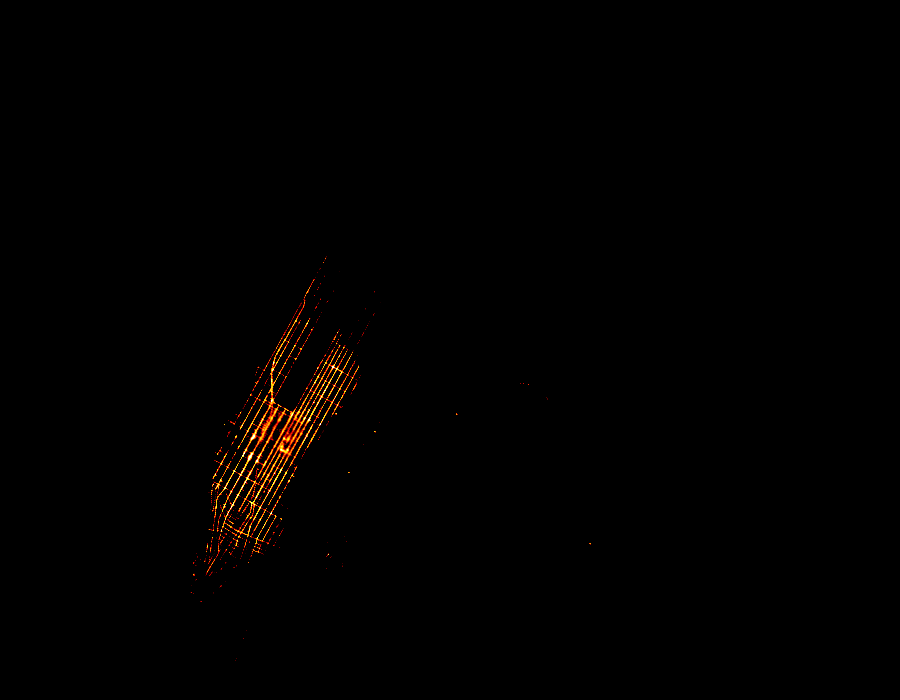

In [5]:
import colorcet
agg = ds.Canvas(plot_width = 900, plot_height = 700).points(data, 'x','y',agg=ds.count())
tf.set_background(tf.shade(agg.where(agg>=np.percentile(agg,99)),cmap=colorcet.fire),"black",name="testing")




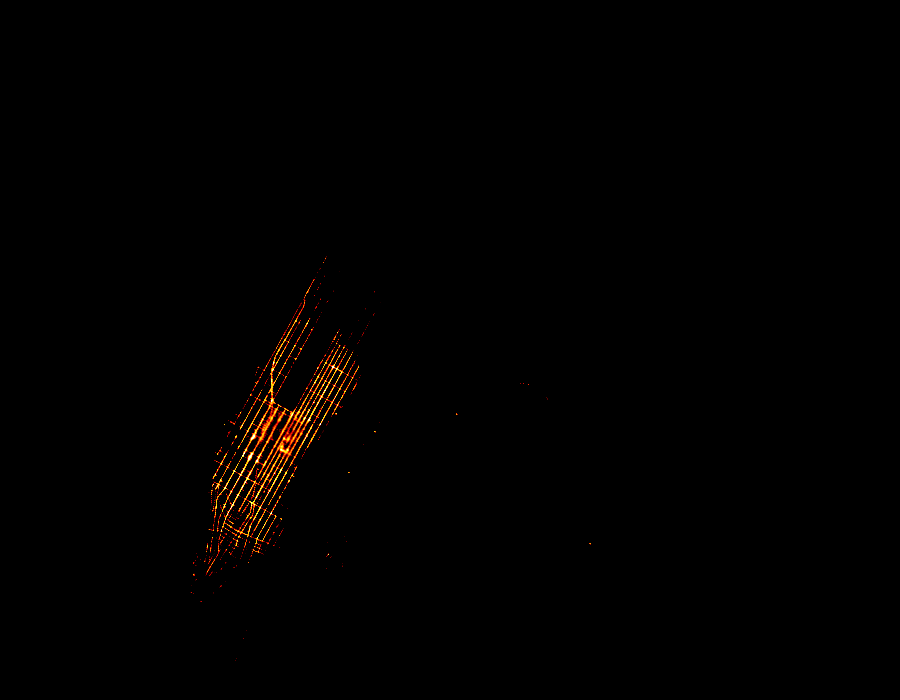

In [6]:

agg = ds.Canvas(plot_width = 900, plot_height = 700).points(data, 'x','y')
tf.set_background(tf.shade(agg.where(agg>=np.percentile(agg,99)),cmap=colorcet.fire),"black",name="testing")




In [16]:
agg = ds.Canvas(plot_width = 900, plot_height = 700).points(data, 'x','y')
tf.set_background(tf.shade(agg.where(agg>=np.percentile(agg,96)),cmap=colorcet.fire),"black",name="testing")




In [ ]:
ix = np.isin(x, goodvalues)
>>> ix
array([[False, False, False],
       [ True,  True, False],
       [False,  True, False]], dtype=bool)
>>> np.where(ix)
(array([1, 1, 2]), array([0, 1, 1]))

/Users/robertwoody/anaconda3/envs/pyviz-tutorial2/lib/python3.6/site-packages/datashader/transfer_functions.py:162: RuntimeWarning: invalid value encountered in log1p
  _interpolate_lookup = {'log': lambda d, m: np.log1p(np.where(m, np.nan, d)),


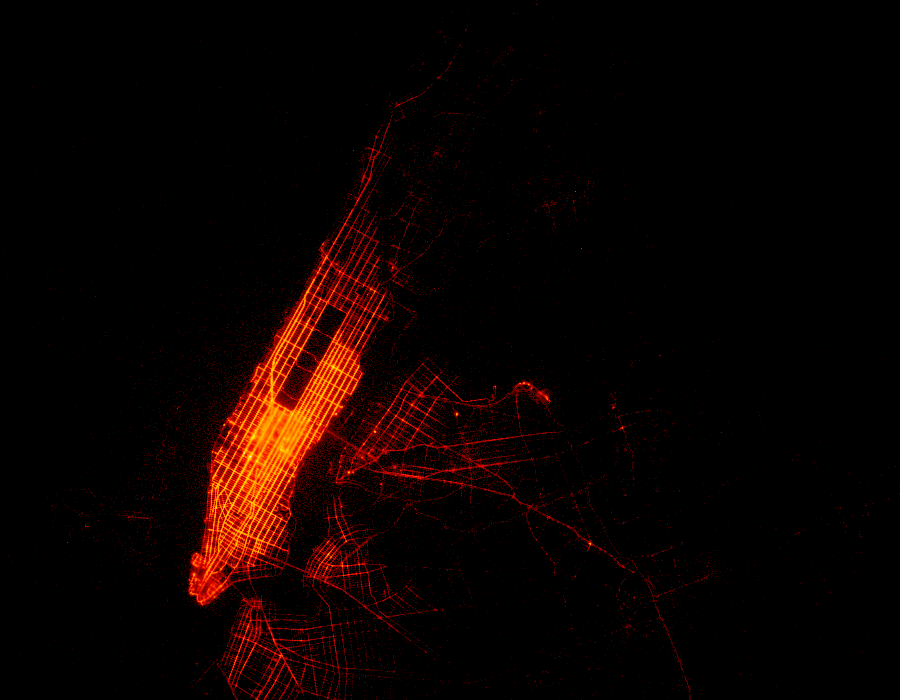

In [60]:
agg = ds.Canvas(plot_width = 900, plot_height = 700).points(data, 'x','y')
tf.set_background(tf.shade(agg,how='log',cmap=colorcet.fire),"black",name="testing")



/Users/robertwoody/anaconda3/envs/pyviz-tutorial2/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log1p
  app.launch_new_instance()


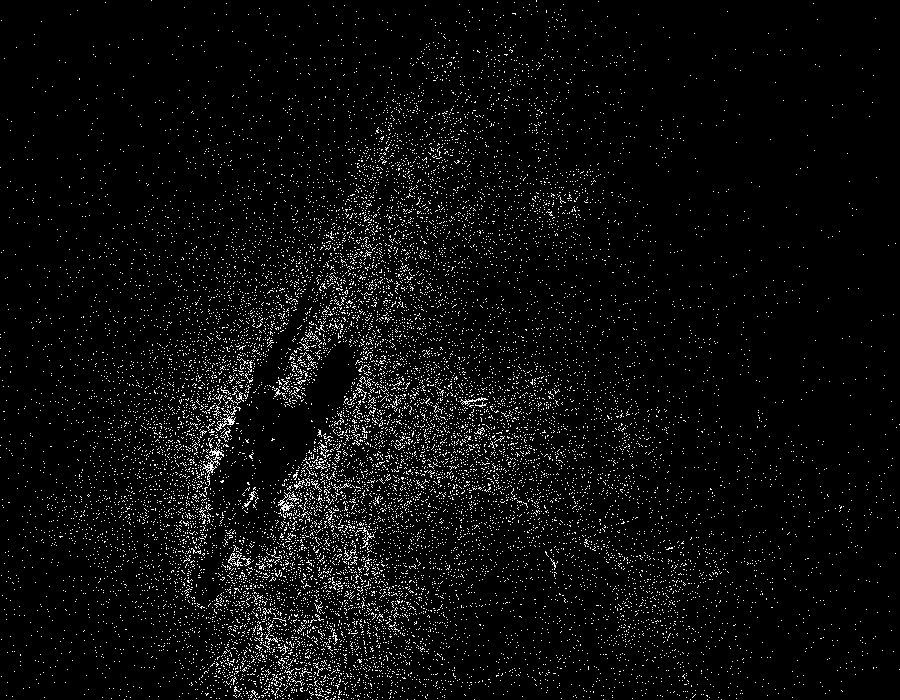

In [62]:
import colorcet
agg = ds.Canvas(plot_width = 900, plot_height = 700).points(data, 'x','y',agg=ds.mean('fare_amount'))
img = tf.set_background(tf.shade(agg.where(agg>=5),how=lambda d,m: np.where(m,np.log1p(d),0),cmap=colorcet.fire),"black",name="testing")

img


In [31]:
import colorcet

aggc = ds.Canvas(plot_width = 900, plot_height = 700).points(data, 'x', 'y', ds.count_cat('passenger_count'))
agg_d3_d5=aggc.sel(passenger_count=[2,5])
#ds.Canvas(plot_width = 900, plot_height = 700).points(data, 'x','y',agg=agg_d3_d5)
tf.set_background(tf.shade(agg_d3_d5,cmap=colorcet.fire),"black",name="testing")




In [11]:
tf.Images(
tf.spread(img, px=1, shape='square',name="spread 2px"))

In [ ]:
import geoviews as gv

%opts WMTS [width=500 height=500]

tiles = gv.WMTS('https://maps.wikimedia.org/osm-intl/{Z}/{X}/{Y}@2x.png')

%time points = gv.operation.project_points(gv.Points(verts, vdims=['z']))

tiles * datashade(hv.TriMesh((tris, points)), aggregator=ds.mean('z'), precompute=True)

In [ ]:
np.percentile([4,3,2],99)

In [ ]:
data.head()

In [ ]:
import colorcet
agg = ds.Canvas(plot_width = 900, plot_height = 700).points(data, 'x','y',agg=ds.mean('fare_amount'))
tf.set_background(tf.shade(agg.where(np.,cmap=colorcet.fire),"black",name="testing")




In [ ]:
import holoviews as hv
import geoviews as gv
from holoviews.operation.datashader import datashade
hv.extension('bokeh')

url = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{Z}/{Y}/{X}.jpg'
tile_opts  = dict(width=1000,height=600,xaxis=None,yaxis=None,bgcolor='black',show_grid=False)
map_tiles  = gv.WMTS(url).opts(style=dict(alpha=0.5), plot=tile_opts)
points     = hv.Points(df, ['dropoff_x', 'dropoff_y'])
taxi_trips = datashade(points, x_sampling=1, y_sampling=1, cmap=fire, width=1000, height=600)

map_tiles * taxi_trips

You can select the "Wheel Zoom" tool on the right and then do panning and zooming (with the scroll bar).  The maps will update as you zoom, but the datashaded image will only update if you have a live Python process running. If you do have Python "live", each time you zoom in, the data will be re-aggregated at the new zoom level, converted to an image, and displayed embedded on the map data, making it simple to explore and understand the data.

At the most basic level, Datashader can accept scatterplot points (as above), line segments (for time series and trajectories), and rasters, and can turn each of these into a regularly sampled array or the corresponding pixel-based image.  The rest of this getting-started guide shows how to go from your data to either images or interactive plots, as simply as possible. The next [getting-started section](2_Pipeline.ipynb) breaks down each of the steps taken by datashader, using a synthetic dataset so that you can see precisely how the data relates to the images. The [user guide](../user_guide/) then explains each of the steps in much more detail.